In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt 
import seaborn as sns 
from datetime import datetime

In [3]:
data = pd.read_csv(r'./src/data/marketing_campaign.csv')

In [4]:

data['Age'] = 2014-data['Year_Birth']

data["Frequency"]=data["NumDealsPurchases"] + data["NumWebPurchases"] + data["NumCatalogPurchases"] + data["NumStorePurchases"]


data["Monetary"] = data["MntWines"]+ data["MntFruits"]+ data["MntMeatProducts"]+ data["MntFishProducts"]+ data["MntSweetProducts"]+ data["MntGoldProds"]


data['Living_With'] = data['Marital_Status'].replace({'Married':'Partner','Together':'Partner',
                                                 'Absurd':'Alone','Widow':'Alone','YOLO':'Alone','Divorced':'Alone','Single':'Alone'})

data['Children'] = data['Kidhome'] + data['Teenhome']


data['Family_Size'] = data['Living_With'].replace({'Alone': 1, 'Partner': 2}) + data['Children']


data['Education'] = data['Education'].replace({'Basic':'Undergraduate','2nd Cycle':'Undergraduate','2n Cycle':'Undergraduate',
                                          'Graduation':'Graduate','Master':'Postgraduate','PhD':'Postgraduate'})

data = data.rename(columns={'MntWines':'Wines','MntFruits':'Fruits','MntMeatProducts':'Meat',
                       'MntFishProducts':'Fish','MntSweetProducts':'Sweets','MntGoldProds':'Gold'})

drop_col = ["Marital_Status", "Year_Birth"]
data = data.drop(drop_col, axis=1)

In [5]:
df = data.copy()

In [6]:
df.head()

,ID,Education,Income,Kidhome,Teenhome,Dt_Customer,Recency,Wines,Fruits,Meat,...,Complain,Z_CostContact,Z_Revenue,Response,Age,Frequency,Monetary,Living_With,Children,Family_Size
0,5524,Graduate,58138.0,0,0,4/9/2012,58,635,88,546,...,0,3,11,1,57,25,1617,Alone,0,1
1,2174,Graduate,46344.0,1,1,8/3/2014,38,11,1,6,...,0,3,11,0,60,6,27,Alone,2,3
2,4141,Graduate,71613.0,0,0,21-08-2013,26,426,49,127,...,0,3,11,0,49,21,776,Partner,0,2
3,6182,Graduate,26646.0,1,0,10/2/2014,26,11,4,20,...,0,3,11,0,30,8,53,Partner,1,3
4,5324,Postgraduate,58293.0,1,0,19-01-2014,94,173,43,118,...,0,3,11,0,33,19,422,Partner,1,3


In [7]:
df.shape

(2240, 33)

In [8]:
for i in df.columns:
    print('Name of column {}'.format(i))
    print(df[i].unique())
    print('Number of unique values in {} are {}'.format( i , df[i].nunique()))
    print('Data type :{}'.format(df.dtypes[i]))
    print('count values in {} is {}'.format(i,df[i].count()))
    print('---------')

Name of column ID
[5524 2174 4141 ... 7270 8235 9405]
Number of unique values in ID are 2240
Data type :int64
count values in ID is 2240
---------
Name of column Education
['Graduate' 'Postgraduate' 'Undergraduate']
Number of unique values in Education are 3
Data type :object
count values in Education is 2240
---------
Name of column Income
[58138. 46344. 71613. ... 56981. 69245. 52869.]
Number of unique values in Income are 1974
Data type :float64
count values in Income is 2216
---------
Name of column Kidhome
[0 1 2]
Number of unique values in Kidhome are 3
Data type :int64
count values in Kidhome is 2240
---------
Name of column Teenhome
[0 1 2]
Number of unique values in Teenhome are 3
Data type :int64
count values in Teenhome is 2240
---------
Name of column Dt_Customer
['4/9/2012' '8/3/2014' '21-08-2013' '10/2/2014' '19-01-2014' '9/9/2013'
 '13-11-2012' '8/5/2013' '6/6/2013' '13-03-2014' '15-11-2013' '10/10/2012'
 '24-11-2012' '24-12-2012' '31-08-2012' '28-03-2013' '3/11/2012'
 '

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,2240.0,5592.159821,3246.662198,0.0,2828.25,5458.5,8427.75,11191.0
Income,2216.0,52247.251354,25173.076661,1730.0,35303.00,51381.5,68522.00,666666.0
Kidhome,2240.0,0.444196,0.538398,0.0,0.00,0.0,1.00,2.0
Teenhome,2240.0,0.506250,0.544538,0.0,0.00,0.0,1.00,2.0
Recency,2240.0,49.109375,28.962453,0.0,24.00,49.0,74.00,99.0
Wines,2240.0,303.935714,336.597393,0.0,23.75,173.5,504.25,1493.0
Fruits,2240.0,26.302232,39.773434,0.0,1.00,8.0,33.00,199.0
Meat,2240.0,166.950000,225.715373,0.0,16.00,67.0,232.00,1725.0
Fish,2240.0,37.525446,54.628979,0.0,3.00,12.0,50.00,259.0
Sweets,2240.0,27.062946,41.280498,0.0,1.00,8.0,33.00,263.0


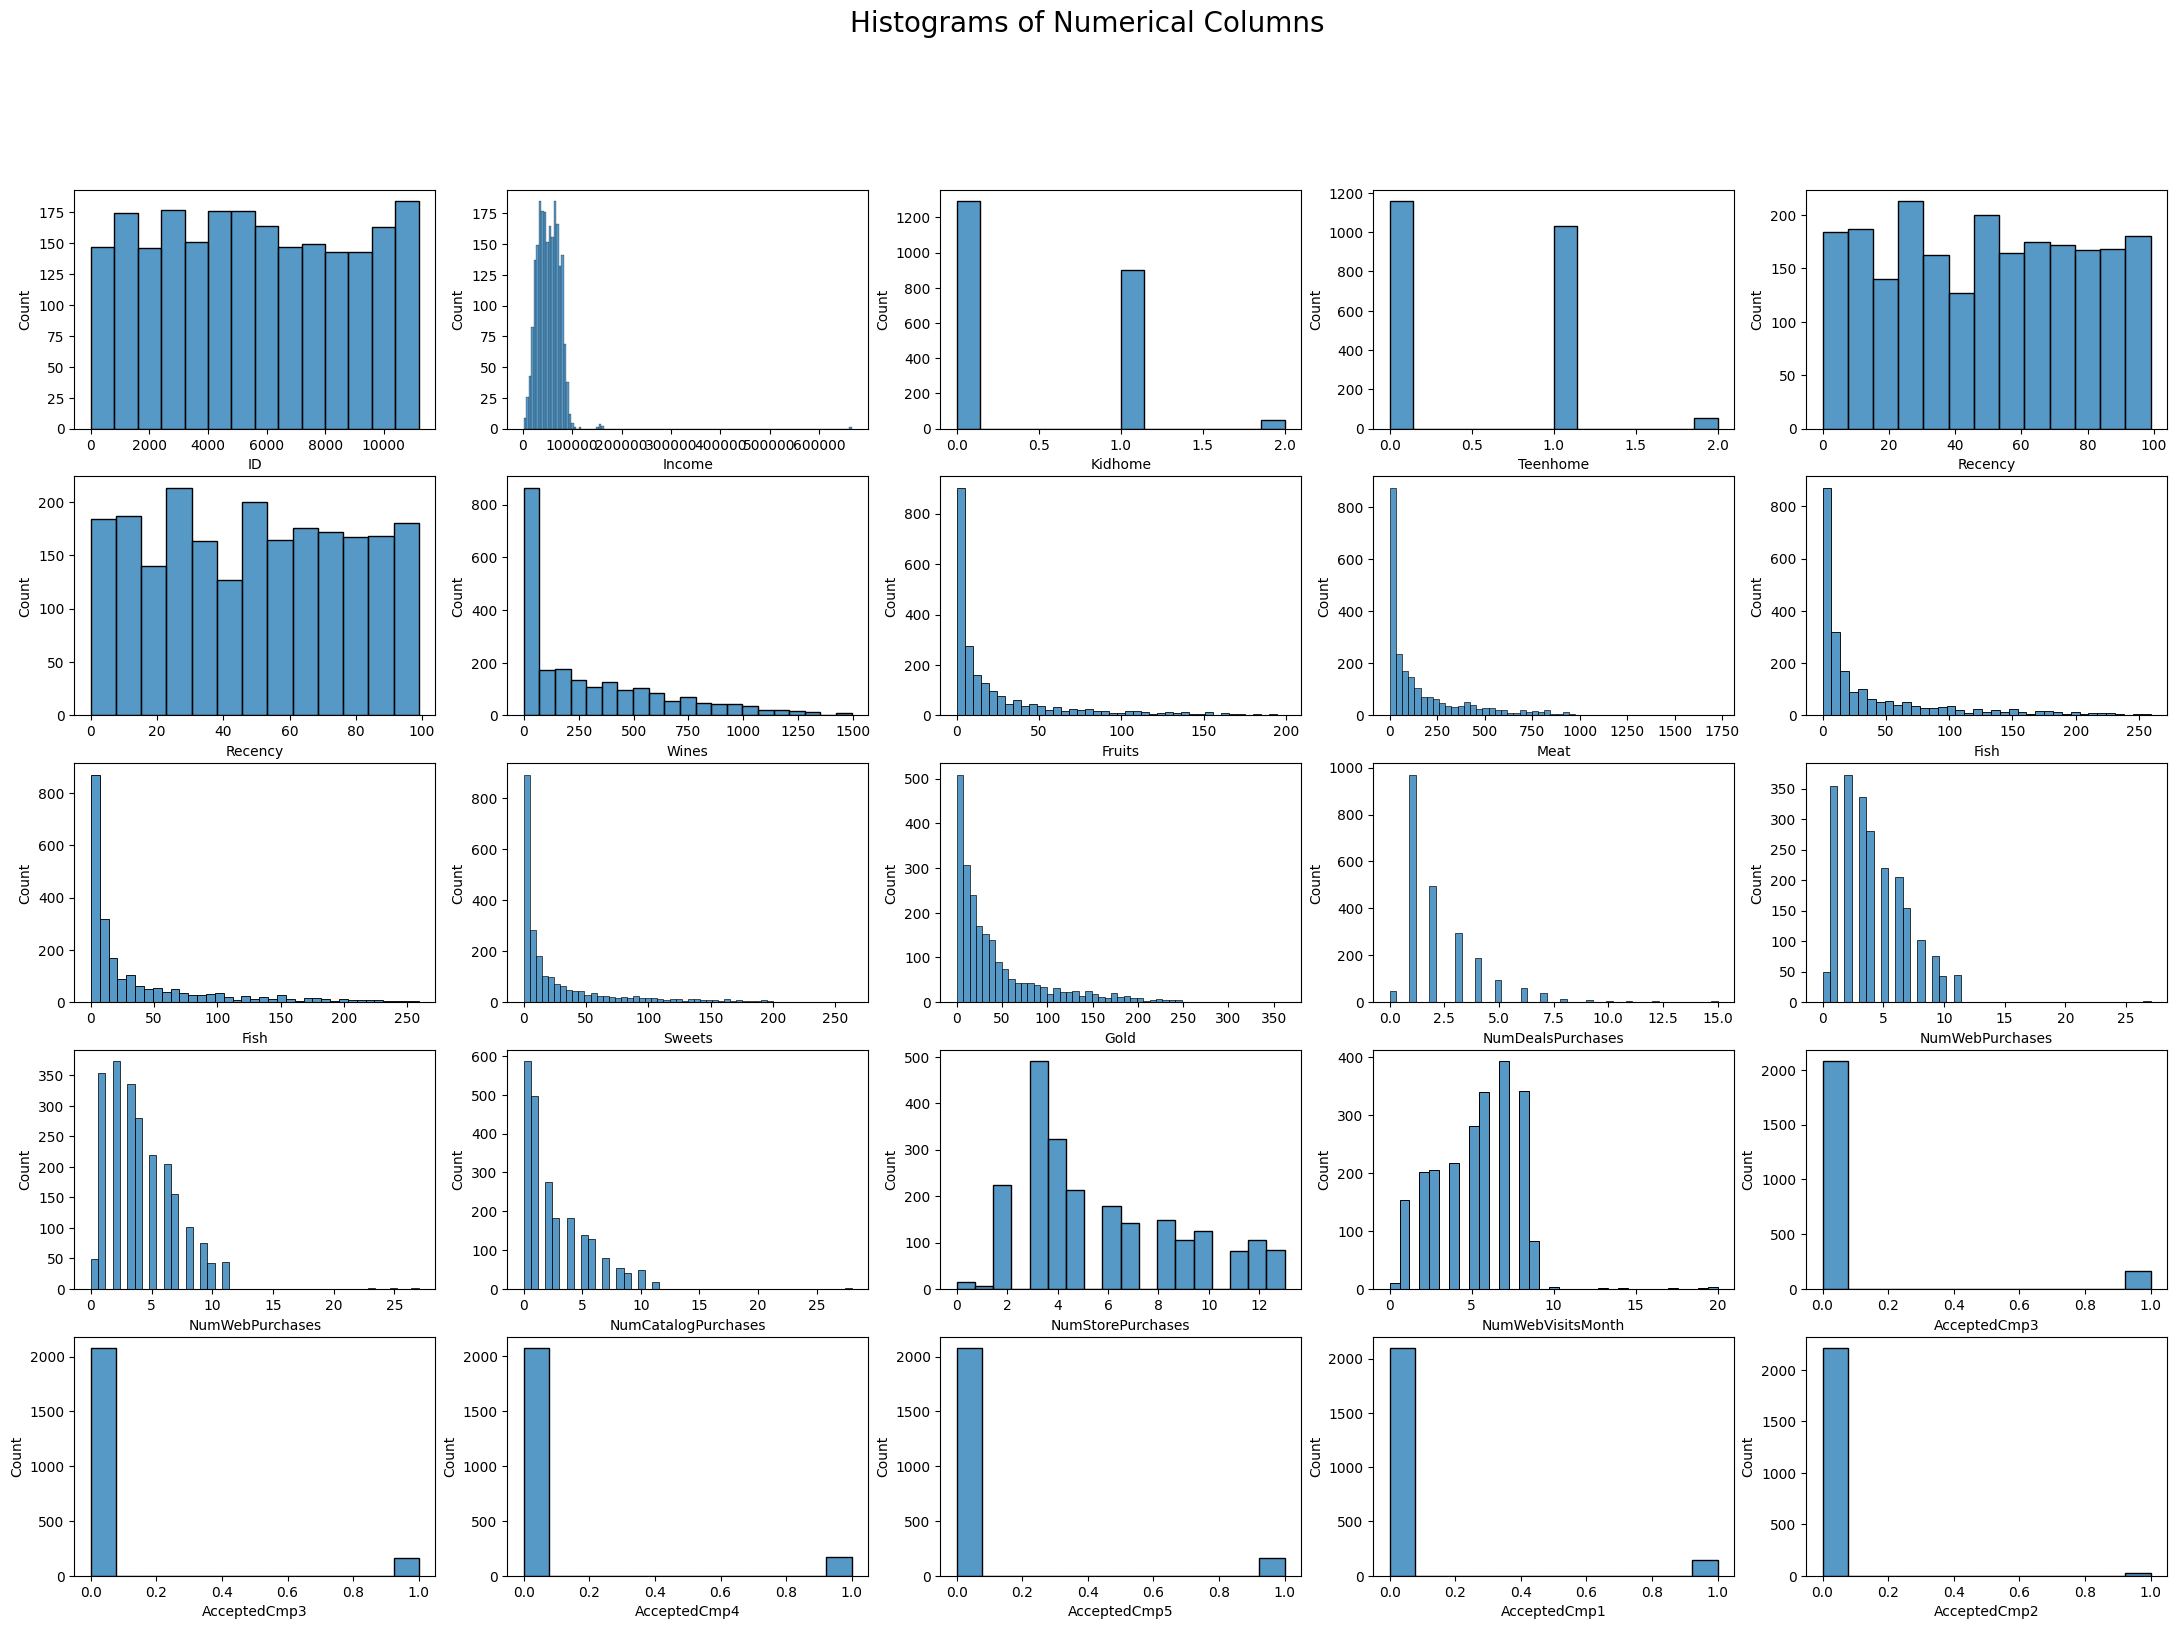

In [10]:
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
len(numerical_cols)
fig,ax=plt.subplots(5,5,figsize=(27,18))
fig.suptitle('Histograms of Numerical Columns', fontsize=20)
for i in range(0,5):
    for j in range(0,5):
        sns.histplot(data=df,x=numerical_cols[i*4+j],ax=ax[i][j])

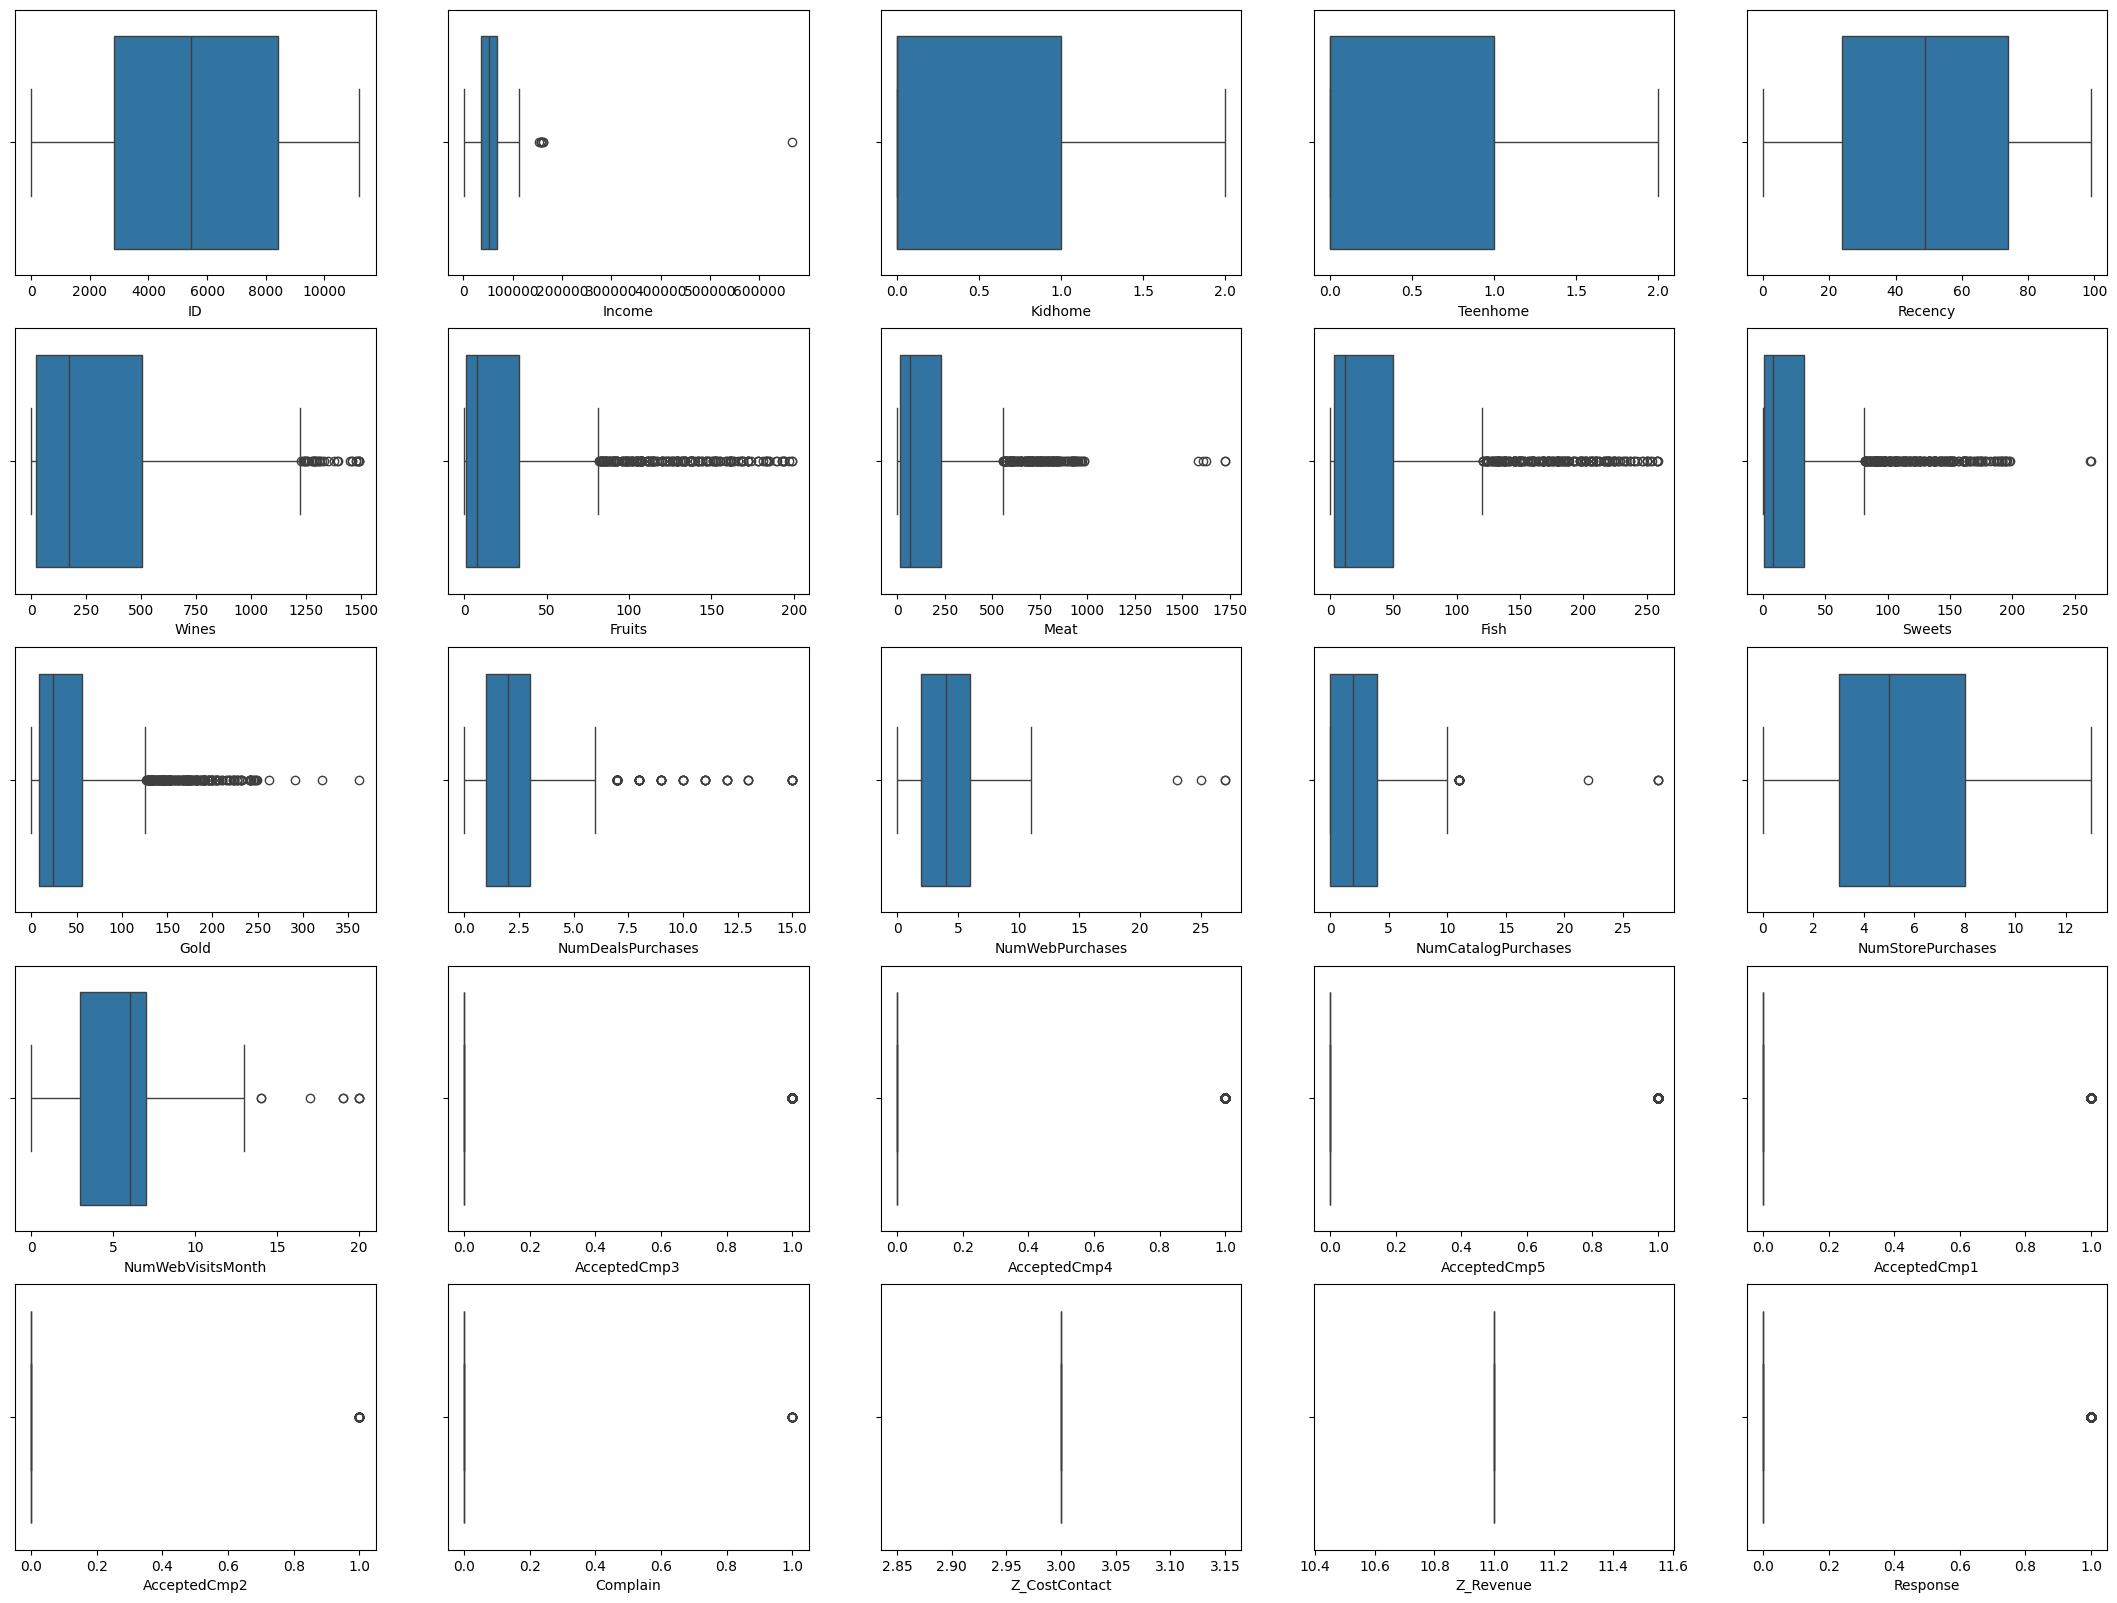

In [11]:
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
fig.suptitle('boxplot of Numerical Columns', fontsize=20)
fig,ax=plt.subplots(5,5,figsize=(27,20))
for i in range(0,5):
    for j in range(0,5):
        sns.boxplot(data=df,x=numerical_cols[i*5+j],ax=ax[i][j])

làm rõ về các vấn đề sau Như sau :
+ nhóm khách hàng nào mua thực hiện mua các sãn phẩm nhiều nhất?
+ thực phẩm nào là nhóm được yêu thích nhất với số lượng nhiều nhất ?
+ lý do khiến cho mặt hàng đó được mua nhiều ?
+ về các khuyến mãi thì được áp dụng nhiều không và tình trạng phàn nàn của khách hàng ?

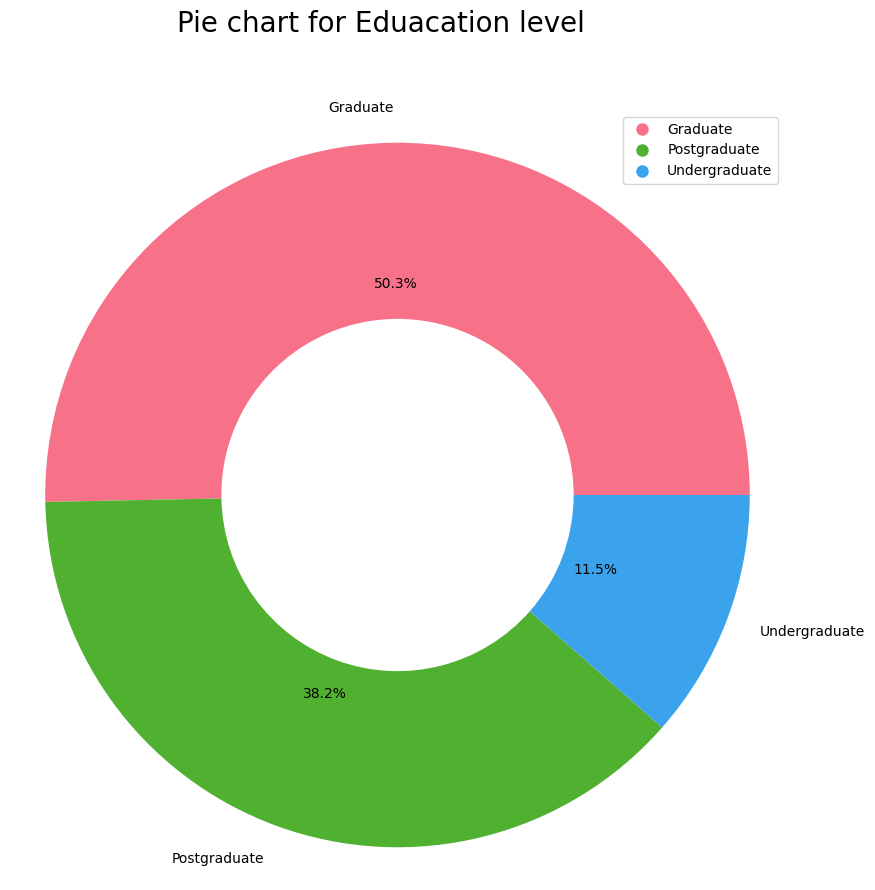

In [12]:

education_counts = df['Education'].value_counts()
hue_variable = df['Education']


plt.figure(figsize=(10,10))
plt.suptitle('Pie chart for Eduacation level ', fontsize=20)


plt.pie(education_counts, labels=education_counts.index, autopct='%1.1f%%',colors=sns.color_palette("husl", len(education_counts)), wedgeprops=dict(width=0.5))


handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10) for color in sns.color_palette("husl", len(education_counts))]
plt.legend(handles, hue_variable.unique())


plt.axis('equal')

plt.show()

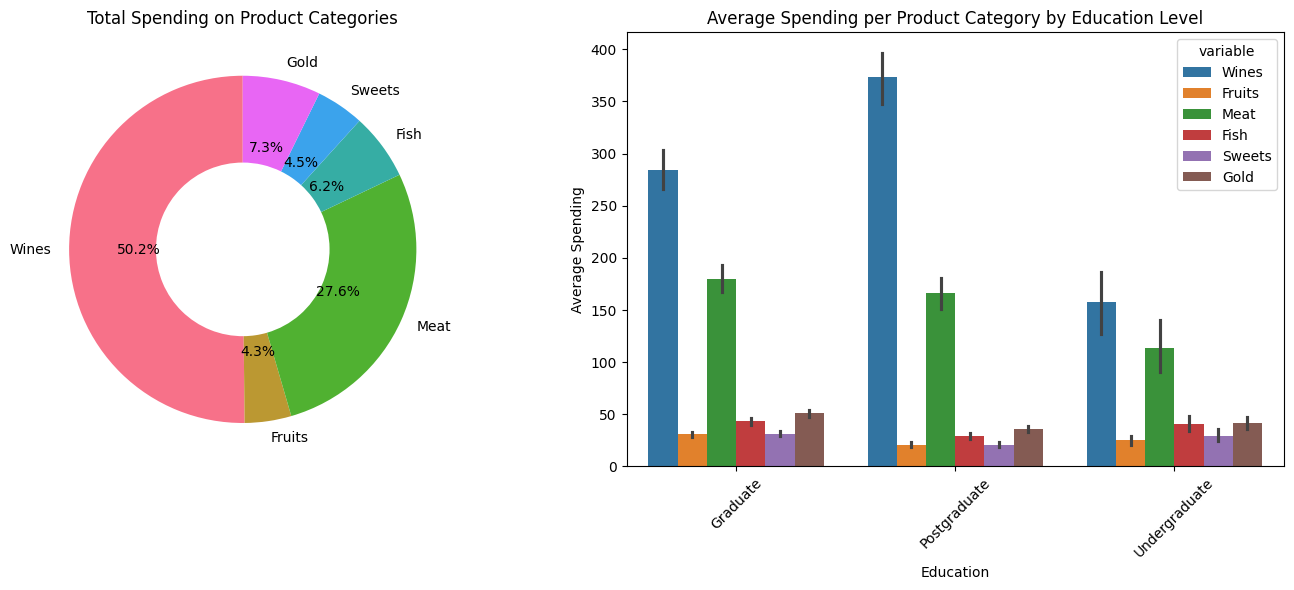

In [13]:

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))


product_categories = ['Wines', 'Fruits', 'Meat', 'Fish', 'Sweets', 'Gold']
total_spending = df[product_categories].sum()

ax1.pie(total_spending, labels=total_spending.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette("husl", len(product_categories)),wedgeprops=dict(width=0.5))
ax1.set_title('Total Spending on Product Categories')

sns.barplot(x='Education', y='value', hue='variable', data=pd.melt(df, id_vars=['Education'], value_vars=product_categories), ax=ax2)
ax2.set_title('Average Spending per Product Category by Education Level')


ax2.set_ylabel('Average Spending')


ax2.tick_params(axis='x', rotation=45)


plt.tight_layout()

plt.show()

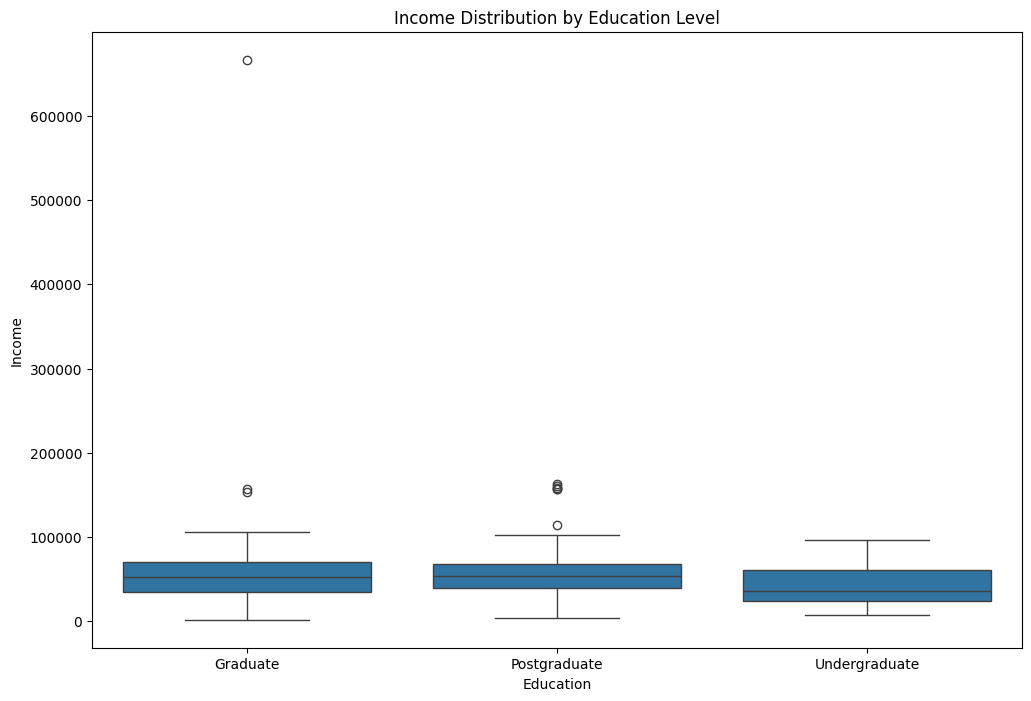

In [14]:

fig, ax = plt.subplots(figsize=(12, 8))


sns.boxplot(x='Education', y='Income', data=df, ax=ax)


ax.set_ylabel('Income')
ax.set_title('Income Distribution by Education Level')


plt.show()

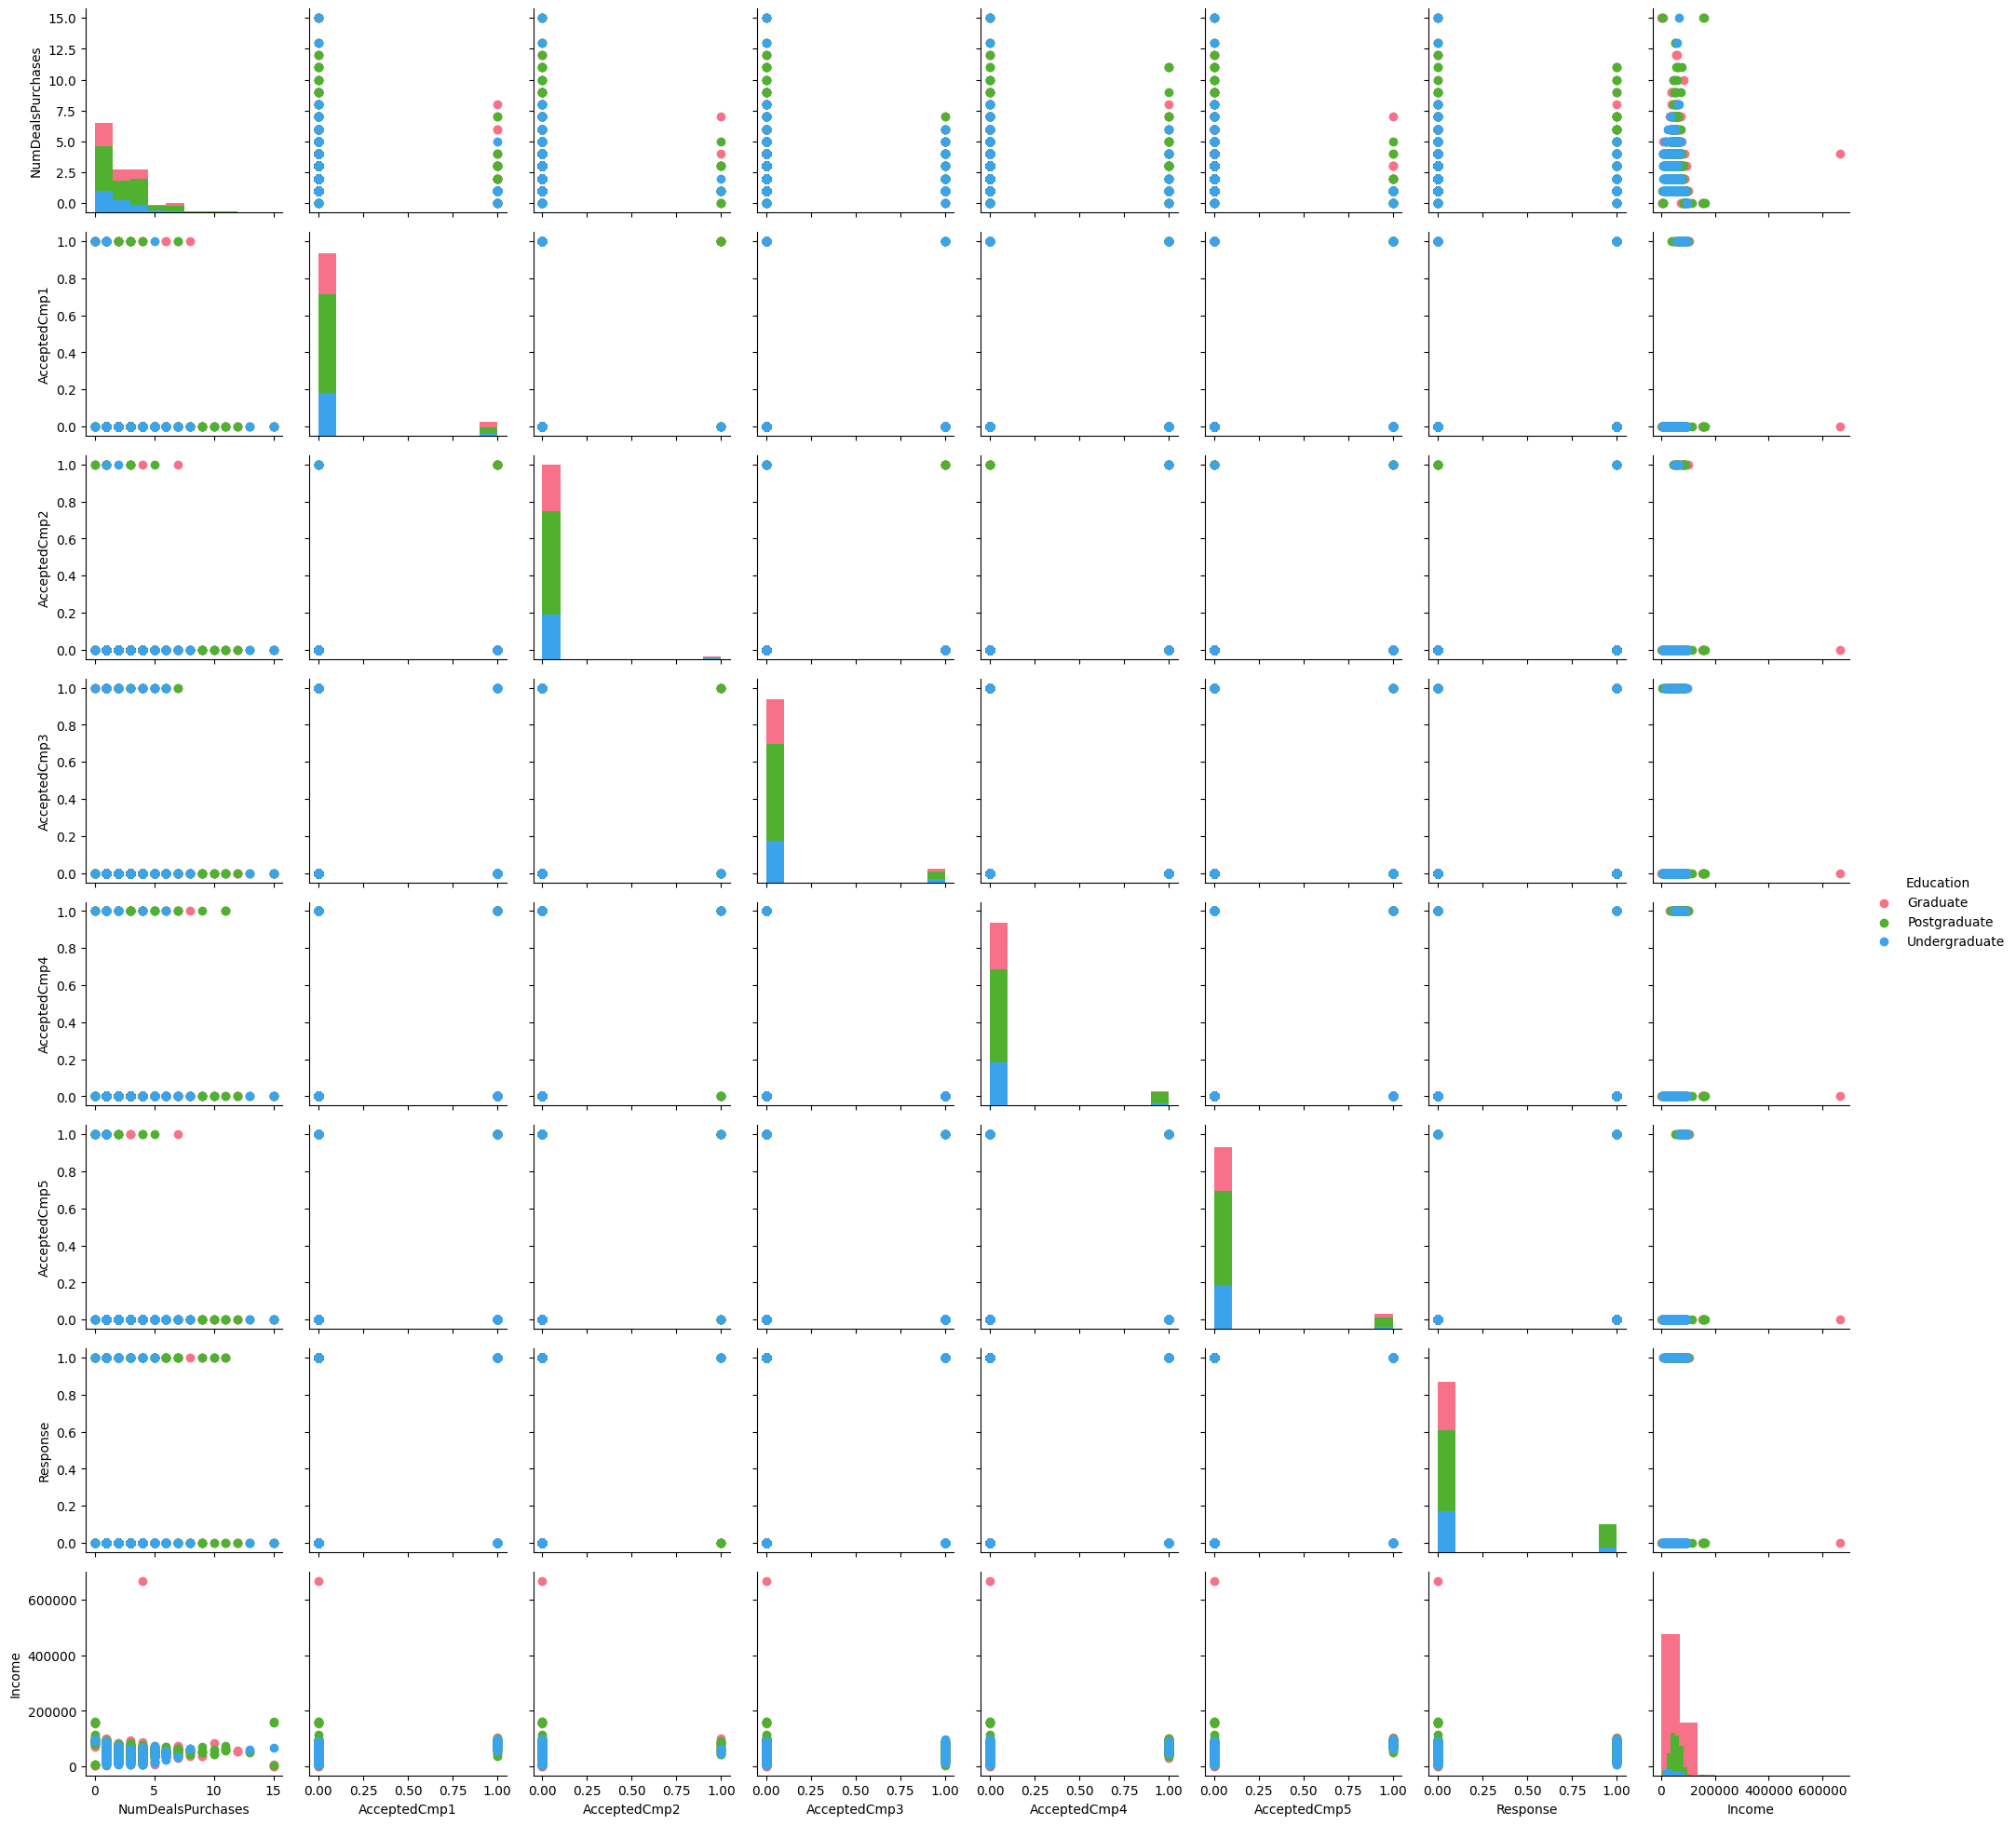

In [15]:
columns_of_interest = ['NumDealsPurchases', 'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response', 'Education', 'Income']
df_selected = df[columns_of_interest]


g = sns.PairGrid(df_selected, hue='Education', palette='husl')
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter)
g.add_legend()


plt.show()